# 모델의 성능 검증하기
- 광물데이터 사용

## 1. 데이터 전체로 정확도 구해보기

### 1. EDA

In [ ]:
import pandas as pd

#광물데이터 불러오기기
df = pd.read_csv('./data/sonar3.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [ ]:
df.shape

(208, 61)

In [ ]:
# 일반암석(0)과 광석(1)이 몇 개 있는지 확인 
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

### 2. 데이터 분류

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.shape, y.shape)

(208, 60) (208,)


### 3. 모델 설정

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 실행
history = model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 1s 3ms/step - loss: 0.6712 - accuracy: 0.5433
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6827
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6442
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.7452
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.7212
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7548
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7163
Epoch 8/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7837
Epoch 9/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7596
Epoch 10/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7740
Epoch 11/

## 2. 학습데이터셋 & 테스트데이터셋으로 나눠서 정확도 구하기

### 1. 데이터를 train과 test로 분류

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

### 2. 모델 설정 & 테스트데이터로 평가

In [ ]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 실행
history = model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4759
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5448
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5862
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6276
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6483
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6414
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6483
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6621
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6690
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7034
Epoch 11/

### 3. test데이터로 모델 평가

In [ ]:
# 모델을 테스트셋에 적용해 정확도 구하기 
score = model.evaluate(X_test, y_test)
print('Test accuracy :', score[1])

2/2 [==============================] - 0s 27ms/step - loss: 0.3253 - accuracy: 0.8730
Test accuracy : 0.8730158805847168


## 3. 모델 저장 & 재사용하는 방법

In [ ]:
# 학습된 모델 이름과 저장할 위치를 함께 지정

model.save('./data/model/my_model.hdf5')

In [ ]:
# 테스트를 위해 방금 사용한 모델 메모리에서 삭제 
del model

In [ ]:
# 모델 새로 불러오기
from tensorflow.keras.models import Sequential, load_model
model = load_model('./data/model/my_model.hdf5') # 이미 학습이 돼 있는 모델임임

# 불러온 모델을 테스트셋에 적용해 보기
score = model.evaluate(X_test, y_test)
print('Test accuracy :', score[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.3253 - accuracy: 0.8730
Test accuracy : 0.8730158805847168


## 4. K-fold 교차검증 해보기

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# 광물데이터 불러오기
df = pd.read_csv('./data/sonar3.csv', header=None)

# 피처와 레이블로 분류
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 교차횟수 지정
K = 5

# KFold 함수 불러오기, 샘플이 치우치지 않도록 섞어주기
kfold = KFold(n_splits = K, shuffle=True)


# 모델 설계 함수 생성성
def model_fn() :
  model = Sequential()
  model.add(Dense(24, input_dim=60, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

#정확도가 채워질 빈 리스트 생성
acc_score = []

# K겹 교차검증을 이용해 k번의 학습 실행 
for train_index, test_index in kfold.split(X) : 
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = model_fn()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history=model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0) # verbose=0 은 학습이실행중인걸 보여주는 bar를 안 보여줌
  
  accuracy = model.evaluate(X_test, y_test)[1] # 정확도 구하기
  acc_score.append(accuracy) # 리스트에 저장

# k번 실습된 정확도 평균 구하기 
avg_score = sum(acc_score)/K

# 결과 추출 
print('정확도:', acc_score)
print('정확도 평균 :', avg_score)

2/2 [==============================] - 0s 9ms/step - loss: 0.5734 - accuracy: 0.8095


2/2 [==============================] - 0s 12ms/step - loss: 0.8035 - accuracy: 0.7143


2/2 [==============================] - 0s 8ms/step - loss: 0.7960 - accuracy: 0.8049
정확도: [0.8095238208770752, 0.7142857313156128, 0.761904776096344, 0.8780487775802612, 0.8048780560493469]
정확도 평균 : 0.793728232383728


In [ ]:
list(kfold.split(X))

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,
          15,  16,  17,  19,  20,  21,  23,  24,  25,  26,  27,  30,  32,
          33,  34,  35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,
          47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  58,  59,  60,
          61,  62,  63,  64,  65,  66,  68,  69,  70,  71,  72,  73,  77,
          78,  80,  81,  82,  84,  86,  87,  88,  90,  91,  93,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
         112, 114, 115, 116, 119, 120, 121, 122, 123, 124, 125, 126, 128,
         129, 130, 131, 132, 133, 134, 135, 136, 139, 140, 142, 143, 145,
         146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 158, 159, 160,
         161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 175,
         176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 189, 191,
         193, 194, 197, 199, 200, 201, 204, 205, 206, 207]),
  array([ 11,  14,  18,  22,  28,  29,  31,  41,  5

## 5. 모델성능 향상시키기

### 1. EDA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('./data/wine.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
df.shape

(6497, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


### 2. 피처와 레이블로 분류

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.shape, y.shape)

(6497, 12) (6497,)


### 3. Train과 Test로 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, shuffle=True)

### 4. 모델 설계

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 30)                390       
                                                                 
 dense_22 (Dense)            (None, 12)                372       
                                                                 
 dense_23 (Dense)            (None, 8)                 104       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. 모델 실행 

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size = 500, validation_split=0.25) # 0.8 X 0.25

Epoch 1/50
8/8 [==============================] - 2s 34ms/step - loss: 4.1330 - accuracy: 0.7542 - val_loss: 3.6378 - val_accuracy: 0.7546
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 3.0523 - accuracy: 0.7542 - val_loss: 2.5872 - val_accuracy: 0.7546
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 2.0807 - accuracy: 0.7542 - val_loss: 1.6123 - val_accuracy: 0.7546
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 1.2160 - accuracy: 0.7542 - val_loss: 0.8503 - val_accuracy: 0.7546
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6094 - accuracy: 0.7570 - val_loss: 0.3942 - val_accuracy: 0.7915
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3851 - accuracy: 0.8332 - val_loss: 0.3637 - val_accuracy: 0.8592
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3209 - accuracy: 0.8581 - val_loss: 0.3238 - val_accuracy: 0.8423
Epoch 8/50
8/8 [=============

### 6. 결과

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test accuracy :', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1665 - accuracy: 0.9415
Test accuracy : 0.9415384531021118


## 6. 모델 업데이트 하기 

### 1. 기본 코드 불러오기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Wine데이터 불러오기, EDA, 피처/레이블로 분류

In [4]:
# 데이터 호출
df = pd.read_csv('./data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
df.shape

(6497, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [8]:
df2 = df.copy()
df2[2].replace(0,df2[2].mean(), inplace = True)
df2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.326039,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.136757,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.010000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.318633,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [9]:
df2.shape

(6497, 13)

In [10]:
# 피처, 레이블로 분류
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

### 3. 모델 설계

In [11]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 4. 모델의 저장 설정 및 실행

In [12]:
# 모델 저장 조건 설정 
modelpath = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.7831.hdf5

Epoch 2: saving model to ./data/model/all/02-0.8000.hdf5

Epoch 3: saving model to ./data/model/all/03-0.8546.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9069.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9108.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9154.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9246.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9223.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9238.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9246.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9300.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9277.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9315.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9315.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9315.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9308.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9315.hdf5

Epoch

### 5. 결과 출력

In [13]:
score = model.evaluate(X_test, y_test)
print('Test accuracy :', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9546
Test accuracy : 0.9546154141426086


## 7. 그래프로 과적합 확인하기 

### 1. 그래프 확인 위한 많은 학습량

In [14]:
history = model.fit(X_train, y_train, epochs=2000, batch_size= 500, validation_split=0.25) 

Epoch 1/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1285 - accuracy: 0.9541 - val_loss: 0.1436 - val_accuracy: 0.9515
Epoch 2/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1277 - accuracy: 0.9551 - val_loss: 0.1420 - val_accuracy: 0.9523
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1261 - accuracy: 0.9566 - val_loss: 0.1417 - val_accuracy: 0.9538
Epoch 4/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1240 - accuracy: 0.9548 - val_loss: 0.1384 - val_accuracy: 0.9523
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1252 - accuracy: 0.9579 - val_loss: 0.1443 - val_accuracy: 0.9569
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1259 - accuracy: 0.9546 - val_loss: 0.1379 - val_accuracy: 0.9585
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1201 - accuracy: 0.9564 - val_loss: 0.1289 - val_accuracy: 0.9554
Epoch 8/2000
8/8 [

In [20]:
# history에저장된 학습 결과 확인
print(type(history.history))
hist_df = pd.DataFrame(history.history)
hist_df.head()
hist_df.shape

<class 'dict'>


(2000, 4)

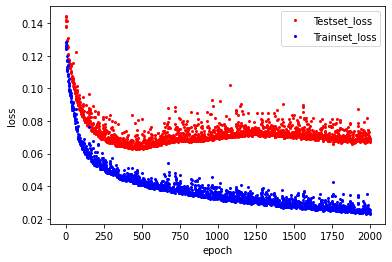

In [22]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장
y_vloss = hist_df[['val_loss']] # val_loss : 테스트셋의 오차 

# y_loss에는 학습셋의 오차 저장
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label = 'Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 8. 학습의 자동 중단


### 1. 데이터 분리 후 모델링

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd


In [25]:
# 와인 데이터 불러오기
df = pd.read_csv('./data/wine.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [38]:
# 와인의 속성 = X , 와인의 분류 = y
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

# 모델 구조 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [39]:
# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

### 2. 학습의 자동중단 및 최적화 모델 저장

In [40]:
# 학습이 언제 자동 중단될지 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20) 
#patience 는 바로 멈추는게 아니라 어디까지 더 돌려보고 멈출지를 정하는 에포치


# 최적화 모델이 저장될 폴더와 모델의 이름 정하기
modelpath = './data/model/bestmodel.hdf5'

# 최적화 모델을 업데이트 하고 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', veerbose = 0, save_best_only = True)

# 모델링 실행
history = model.fit(x_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25, verbose = 1, 
                    callbacks = [early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 2s 56ms/step - loss: 1.2299 - accuracy: 0.7578 - val_loss: 0.9755 - val_accuracy: 0.7469
Epoch 2/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.8110 - accuracy: 0.7578 - val_loss: 0.6316 - val_accuracy: 0.7469
Epoch 3/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.5027 - accuracy: 0.7578 - val_loss: 0.3804 - val_accuracy: 0.7469
Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3892 - accuracy: 0.7703 - val_loss: 0.4066 - val_accuracy: 0.7792
Epoch 5/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3718 - accuracy: 0.7801 - val_loss: 0.3494 - val_accuracy: 0.7585
Epoch 6/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3464 - accuracy: 0.7711 - val_loss: 0.3383 - val_accuracy: 0.7792
Epoch 7/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3256 - accuracy: 0.8086 - val_loss: 0.3254 - val_accuracy: 0.8285
Epoch 8/2000


In [41]:
# 테스트 결과 출력
score = model.evaluate(x_test, y_test)
print('Test accurach :', score[1])

41/41 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9808
Test accurach : 0.9807692170143127
